In [1]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx

In [9]:
%matplotlib inline

In [3]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]

In [4]:
decon_fly = flb.NetFly(1530,rootpath='/media/imager/FlyDataD/FlyDB/')
decon_fly.open_signals()

abf_sp = decon_fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(decon_fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(decon_fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
i1_spike_sig = np.array(decon_fly.abf_electrode[start:stop])
i1_ca = decon_fly.ca_camera_left_model_fits['i1']

In [172]:
run -it make_poster.py

here


make_poster.py:98: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  


[ 0.9  1.   1.   0.9]
[ 1.  1.  1.  1.]
(13, 100, 100)
(13, 100, 100)
(13, 100, 100)


make_poster.py:483: RuntimeWarning: divide by zero encountered in log
  horizontalalignment='left',



IPython CPU timings (estimated):
  User   :     389.14 s.
  System :      28.66 s.
Wall time:     418.21 s.


In [169]:
2**8

256

In [106]:
layout = fifi.FigureLayout('layouts/poster_layout.svg',make_mplfigures = True)
plt.close('all')

here


In [107]:
kw_recon = layout.pathspecs['reconstructed'].mplkwargs()
kw_record = layout.pathspecs['recorded'].mplkwargs()

{'alpha': 1.0, 'color': u'#aa4400', 'lw': 3.1999744002047983}

In [90]:
#layout = fifi.FigureLayout('poster_layout.svg',make_mplfigures = True)

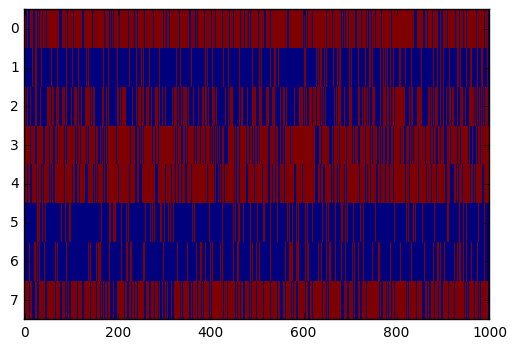

In [38]:
plt.imshow(simulated_shuffled[:,2000:3000],
           aspect ='auto',interpolation = 'none')

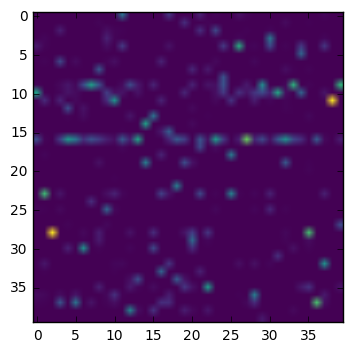

In [37]:
plt.imshow(shuffled_mtrx,cmap = plt.cm.viridis)

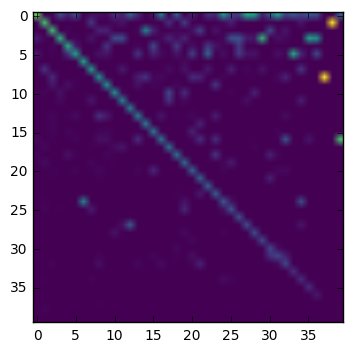

In [28]:
plt.imshow(transition_mtrx,cmap = plt.cm.viridis)

In [36]:
from numpy import random
shuffled_mtrx = random.permutation(random.permutation(transition_mtrx.T).T)
simulated_shuffled_list = [state_table[1]]
for i in range(5000):
    simulated_shuffled_list.append(lpf.next_state(simulated_shuffled_list[-1],
                                           state_table,
                                           shuffled_mtrx))
simulated_shuffled = np.array(simulated_shuffled_list).T

In [118]:
sorted_keys = sorted(flylist[0].spikestates.keys())
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr')]

for cull in cull_list:
    sorted_keys.remove(cull)

state_mtrx,left,right = lpf.make_state_matrix(flylist,sorted_keys,
                                 block_key = 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0')

In [119]:
np.shape(state_mtrx)

(24, 20650)

In [120]:
byte_vector = [2**i for i in range(len(sorted_keys))]

In [121]:
int_rep = np.dot(np.array(byte_vector),state_mtrx)

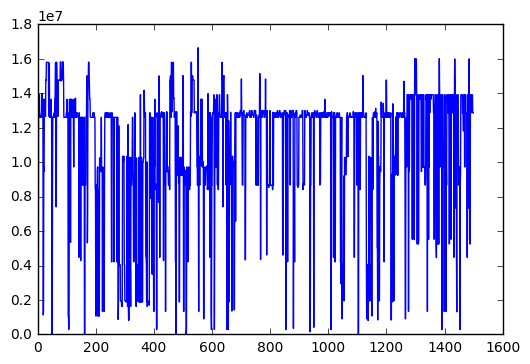

In [122]:
plt.plot(int_rep[500:2000])

In [123]:
unique_states,indxs,inv_indx,counts = np.unique(int_rep,return_index=True,return_inverse = True,return_counts=True)

In [124]:
byte_vector = [2**i for i in range(len(sorted_keys))]

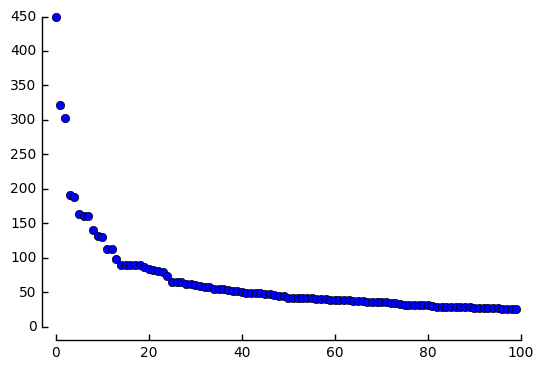

In [129]:
sort_idx = np.argsort(counts)[::-1]
#only a few motor states are common
plt.plot(counts[sort_idx][:100],'o',clip_on = False)
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [138]:
common_state_vector = unique_states[sort_idx]
common_states_bin = ['%024d'%np.int(np.binary_repr(x)) for x in common_state_vector]
common_states_bin = np.array([np.array(list(x)).astype('int') for x in common_states_bin])

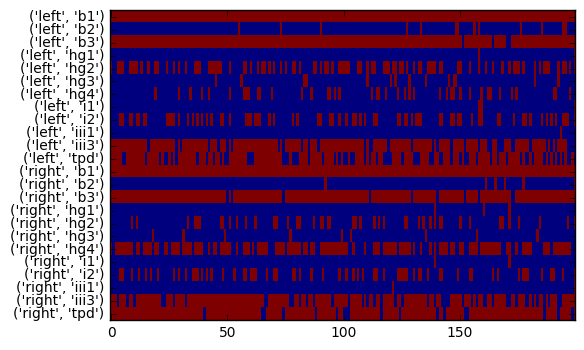

In [145]:
plt.imshow(common_states_bin.T[::-1,:200],aspect = 'auto',interpolation = 'nearest')
lbs = plt.gca().set_yticks(range(0,24))
lbs = plt.gca().set_yticklabels(sorted_keys)